<a href="https://colab.research.google.com/github/brunoegs/DiploDatos_AyVD_Grupo18/blob/main/entregable_parte_2/Entregable_Parte_2_codigoTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
# Eliminación de valores atípicos
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

df_1 = clean_outliers(df, 'salary_monthly_NETO')

##Seleccion Roles

In [ ]:
role_count = df_1.work_role.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Role', 'work_role': 'frequency'})
role_count[:3]


,Role,frequency
0,Developer,2250
1,SysAdmin / DevOps / SRE,644
2,Technical Leader,366


In [ ]:
role_count['proporcion'] = role_count['frequency']/role_count['frequency'].sum()
role_count['frequency_acumulada'] = role_count.proporcion.cumsum()
role_count_filtred= role_count[role_count['frequency_acumulada'] < 0.90]
role_count_filtred

,Role,frequency,proporcion,frequency_acumulada
0,Developer,2250,0.391918,0.391918
1,SysAdmin / DevOps / SRE,644,0.112176,0.504093
2,Technical Leader,366,0.063752,0.567845
3,QA / Tester,243,0.042327,0.610172
4,Manager / Director,212,0.036927,0.647100
5,HelpDesk,193,0.033618,0.680718
6,Project Manager,188,0.032747,0.713465
7,Architect,159,0.027696,0.741160
8,BI Analyst / Data Analyst,134,0.023341,0.764501
9,Consultant,133,0.023167,0.787668


In [ ]:
# Crear columna Junior Senior en base a años experiencia
conditionlist = [
    (df_1['profile_years_experience'] >= 5) ,
    (df_1['profile_years_experience'] > 2) & (df_1['profile_years_experience'] <5),
    (df_1['profile_years_experience'] <= 2)]
choicelist = ['Senior', 'Semi-Senior', 'Junior']
df_1['profile_years_experience_cat'] = numpy.select(conditionlist, choicelist, default='Not Specified')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_1[['profile_years_experience','profile_years_experience_cat']]

,profile_years_experience,profile_years_experience_cat
0,3.0,Semi-Senior
1,5.0,Senior
2,2.0,Junior
3,15.0,Senior
4,9.0,Senior
...,...,...
6090,13.0,Senior
6091,12.0,Senior
6092,2.0,Junior
6093,5.0,Senior


In [ ]:
interesting_roles = list(role_count_filtred['Role'])
filtered_df_role = df_1[df_1.work_role.isin(interesting_roles)]
filtered_df_role[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,profile_years_experience_cat
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,Semi-Senior
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,Senior
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,Junior


In [ ]:
# Orden en base al salario promedio por rol
df_2 = df_1[df_1.work_role.isin(interesting_roles)].groupby('work_role')['salary_monthly_NETO']\
      .mean().sort_values(ascending=False).reset_index().rename(columns={ 'work_role': 'Role'})
list_order_salary=list(df_2.Role)

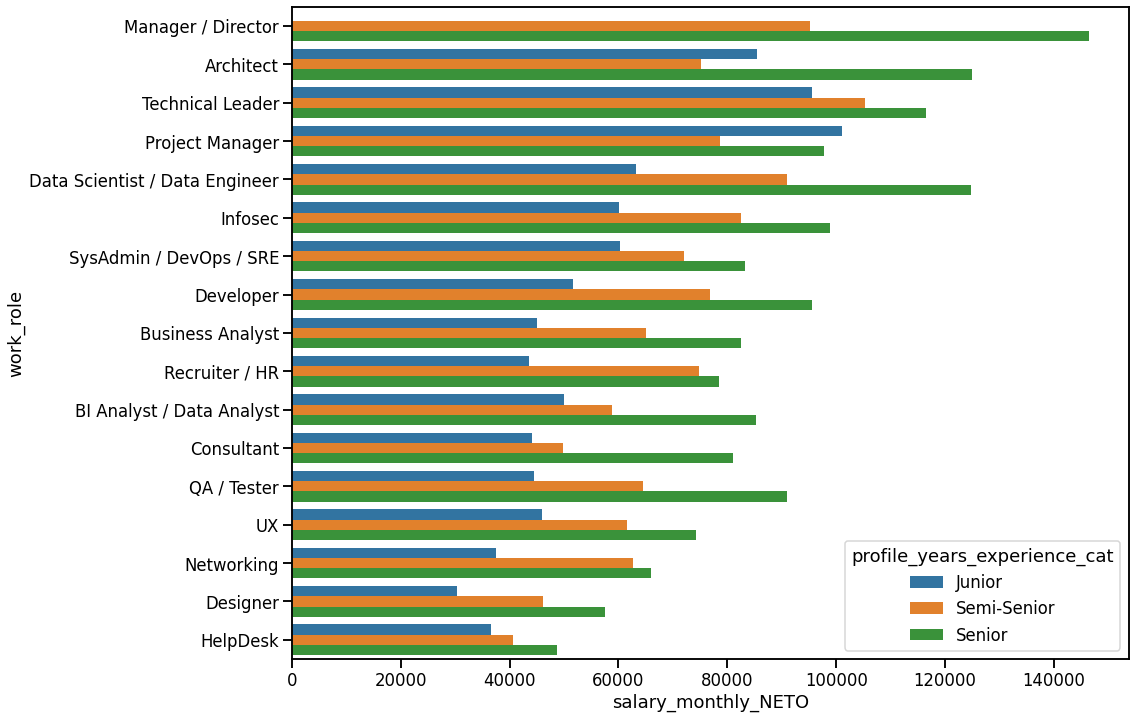

In [ ]:
# Plot con años experiencia
plt.figure(figsize=(15,12))
seaborn.barplot(data=df_1[df_1.work_role.isin(interesting_roles)],
                y='work_role',
                x='salary_monthly_NETO',
                order=list_order_salary,
                estimator=numpy.mean,
                hue=df_1.profile_years_experience_cat,
                ci=None, 
                hue_order=['Junior','Semi-Senior','Senior'])

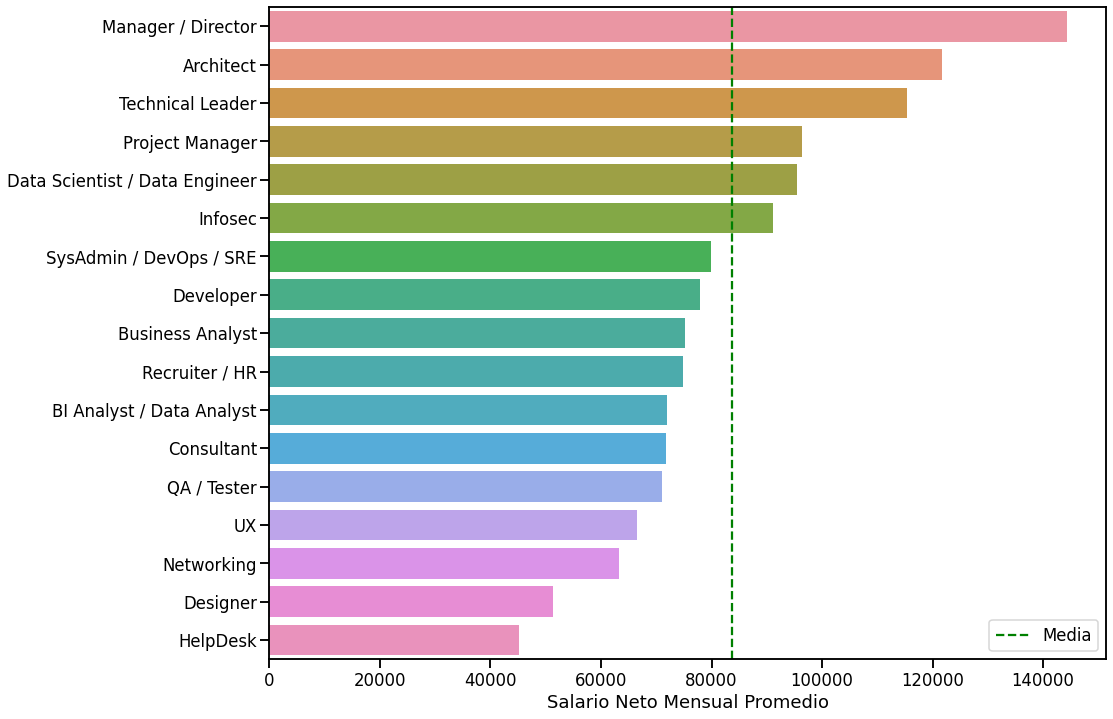

In [ ]:
#Plot sin años experiencia
plt.figure(figsize=(15,12))
seaborn.barplot(data=df_1[df_1.work_role.isin(interesting_roles)],
                y='work_role',x='salary_monthly_NETO',
                order=list_order_salary,
                estimator=numpy.mean,
                ci=None)
plt.xlabel('Salario Neto Mensual Promedio')
plt.ylabel('')
plt.axvline(df_1['salary_monthly_NETO'].mean(), color='green',
            linestyle='--', label='Media')
plt.legend()

¿Cuáles son los puestos mejor pagos en IT? En base a las respuestas de la
'Encuesta Sysarmy de salarios de programadores edición 2020' estos son los 6
puestos que tienen sueldos por encima de la media salarial de la industria IT.